In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [ ]:
#organize data
os.chdir('/content/drive/MyDrive/program/appleLeafAugmentedDataset')

In [ ]:
if os.path.isdir('/content/drive/MyDrive/program/appleLeafAugmentedDataset/train/Apple___Apple_scab') is False:
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/train/Apple___Apple_scab')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/train/Apple___Black_rot')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/train/Apple___Cedar_apple_rust')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/train/Apple___healthy')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/valid/Apple___Apple_scab')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/valid/Apple___Black_rot')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/valid/Apple___Cedar_apple_rust')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/valid/Apple___healthy')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/test/Apple___Apple_scab')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/test/Apple___Black_rot')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/test/Apple___Cedar_apple_rust')
  os.makedirs('/content/drive/MyDrive/program/appleLeafAugmentedDataset/test/Apple___healthy')

os.chdir('../../')


In [ ]:
train_path = "/content/drive/MyDrive/program/appleLeafAugmentedDataset/train"
valid_path = "/content/drive/MyDrive/program/appleLeafAugmentedDataset/valid"
test_path = "/content/drive/MyDrive/program/appleLeafAugmentedDataset/test"

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy'], batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy'], batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy'], batch_size=32, shuffle=False)


Found 3248 images belonging to 4 classes.
Found 928 images belonging to 4 classes.
Found 464 images belonging to 4 classes.


In [ ]:
assert train_batches.n == 3248
assert valid_batches.n == 928
assert test_batches.n == 464
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 4

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


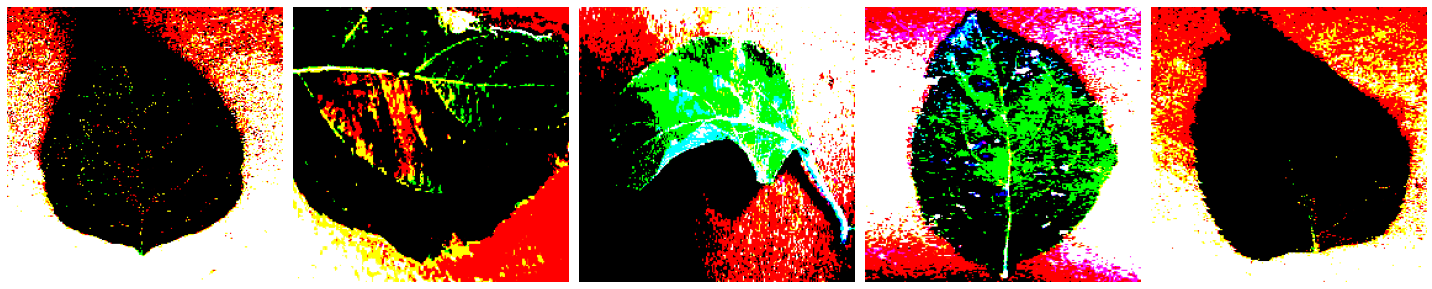

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 7s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.add(Dense(units=4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
model_path = '/content/drive/MyDrive/My ML Project /DL Project/CNN/appleLeafMand/apple_leaf_vgg16_model_v1.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit(x=train_batches,
  validation_data=valid_batches,
  epochs=20,
  callbacks=callbacks_list
)

Epoch 1/20
102/102 [==============================] - 2052s 20s/step - loss: 0.8386 - accuracy: 0.6961 - val_loss: 0.4590 - val_accuracy: 0.8631

Epoch 00001: val_accuracy improved from -inf to 0.86315, saving model to /content/drive/MyDrive/My ML Project /DL Project/CNN/appleLeafMand/apple_leaf_vgg16_model_v1.h5
Epoch 2/20
102/102 [==============================] - 31s 305ms/step - loss: 0.3433 - accuracy: 0.9178 - val_loss: 0.3037 - val_accuracy: 0.9181

Epoch 00002: val_accuracy improved from 0.86315 to 0.91810, saving model to /content/drive/MyDrive/My ML Project /DL Project/CNN/appleLeafMand/apple_leaf_vgg16_model_v1.h5
Epoch 3/20
102/102 [==============================] - 31s 306ms/step - loss: 0.2381 - accuracy: 0.9400 - val_loss: 0.2348 - val_accuracy: 0.9300

Epoch 00003: val_accuracy improved from 0.91810 to 0.92996, saving model to /content/drive/MyDrive/My ML Project /DL Project/CNN/appleLeafMand/apple_leaf_vgg16_model_v1.h5
Epoch 4/20
102/102 [=============================

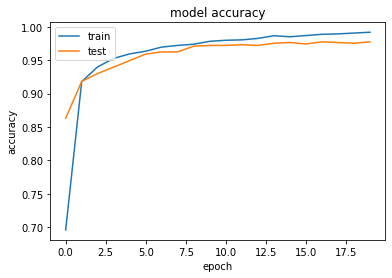

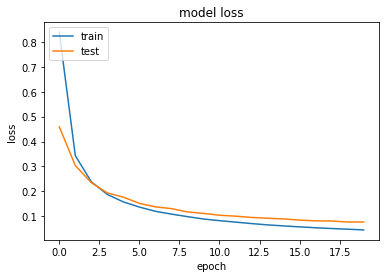

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
for i in predictions:
  print(i)

[9.3141162e-01 3.7816411e-04 1.8642073e-03 6.6345960e-02]
[9.6806359e-01 2.2310557e-02 1.6813031e-04 9.4576646e-03]
[0.4742279  0.00642938 0.2115967  0.30774605]
[9.4737226e-01 3.3155505e-02 2.2784848e-04 1.9244405e-02]
[0.93279743 0.00499696 0.00925793 0.05294771]
[9.9608576e-01 1.3365543e-04 2.7470395e-03 1.0334520e-03]
[0.14975202 0.13643642 0.01099899 0.7028126 ]
[9.9748176e-01 2.4847948e-05 1.2071554e-04 2.3727473e-03]
[9.9957663e-01 4.0738872e-05 1.4108829e-05 3.6854745e-04]
[0.64726424 0.0062453  0.00441281 0.3420776 ]
[9.9919623e-01 6.3176523e-04 6.1542130e-05 1.1051173e-04]
[0.982989   0.00268053 0.00133473 0.01299568]
[9.9798822e-01 7.4026495e-04 3.3637576e-04 9.3512243e-04]
[9.9922955e-01 3.8041177e-04 1.4668936e-04 2.4333678e-04]
[9.7867316e-01 4.2752392e-04 1.3806327e-03 1.9518701e-02]
[9.2518777e-01 1.0878621e-03 7.3580883e-02 1.4344230e-04]
[9.8309720e-01 1.9419201e-03 2.8391296e-04 1.4676938e-02]
[0.7933155  0.0249434  0.01166966 0.17007151]
[9.9775559e-01 3.5394152e-04

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
  print(i)

0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
3
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
0
3
3
3
3
3
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3}

Confusion matrix, without normalization
[[ 94   1   1   4]
 [  0  97   0   3]
 [  1   0  99   0]
 [  2   1   1 160]]


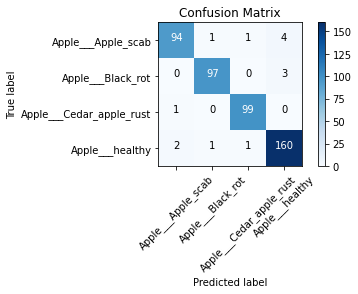

In [ ]:
cm_plot_labels=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_true=test_batches.classes, y_pred=rounded_predictions, target_names=cm_plot_labels)
print(cr)

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.97      0.94      0.95       100
       Apple___Black_rot       0.98      0.97      0.97       100
Apple___Cedar_apple_rust       0.98      0.99      0.99       100
         Apple___healthy       0.96      0.98      0.97       164

                accuracy                           0.97       464
               macro avg       0.97      0.97      0.97       464
            weighted avg       0.97      0.97      0.97       464

